<a href="https://colab.research.google.com/github/assuncaomarcos/daggen/blob/main/notebooks/daggen_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of daggen generate DAGs
-----------

This notebook shows a few examples of how to:
* Generate DAGs using daggen
* How to convert them to [networkx](https://networkx.org/) and [igraph](https://python.igraph.org/en/latest/tutorial.html) DAGs
* How to visualize them using [matplotlib](https://matplotlib.org/)

## Install the required packages:

In [ ]:
!pip3 install daggen
!pip3 install matplotlib
!pip3 install networkx
!pip3 install igraph

## Generate a few DAGs using daggen

In [2]:
import daggen as dg

# To seed daggen
seed = 46464

# Used to vary the values of fat and density parameters
values = [0.3, 0.45, 0.6, 0.7]

# Number of tasks in each generated DAG
num_tasks = [7, 10, 15, 15]

dg_dags = [] # to store the daggen DAGs

for v, n in zip(values, num_tasks):
  dg_dags.append(dg.DAG(seed=seed, num_tasks=n, density=v, fat=v, ccr=1, jump_size=1))

## Convert the DAGs to NetworkX graphs and plot them

Text(0.6, 0.05, 'High fat and density')

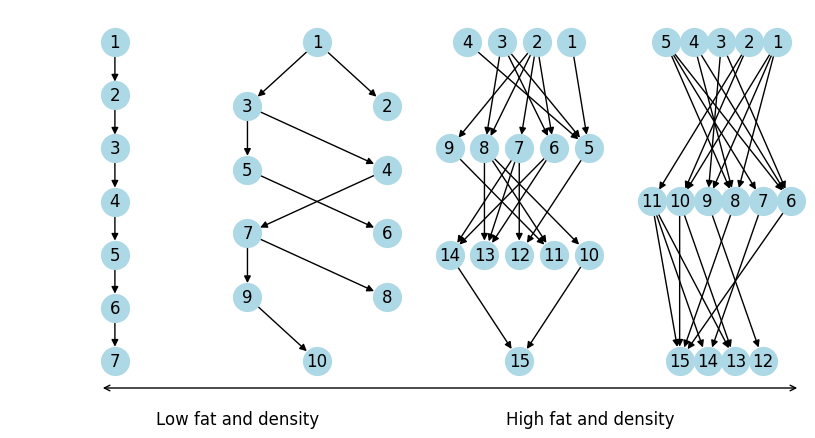

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

height = 10  # height of a plot
width = 5    # width of a plot

fig, axs = plt.subplots(1, len(values), figsize=(height, width))

for i, dag in enumerate(dg_dags):
  tasks, edges = dag.task_n_edge_tuples()
  nx_dag = nx.DiGraph()
  nx_dag.add_nodes_from(tasks)
  nx_dag.add_edges_from(edges)

  for layer, nodes in enumerate(sorted(nx.topological_generations(nx_dag), reverse=True)):
    # multipartite_layout expects the layer as a node attribute,
    # so add the numeric layer value as a node attribute
    for node in nodes:
        nx_dag.nodes[node]["layer"] = layer

  # Compute the multipartite_layout using the "layer" node attribute
  pos = nx.multipartite_layout(nx_dag, subset_key="layer", align='horizontal')
  nx.draw(nx_dag, pos=pos, ax=axs[i], with_labels=True,
          node_color="lightblue", node_size=400, font_family="sans-serif")

# Draw arrow
plt.annotate('', xy=(0.10, 0.10), xycoords='figure fraction', xytext=(0.8, 0.10),
             arrowprops=dict(arrowstyle="<->", color='black'))
plt.text(0.25, 0.05, "Low fat and density", fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.6, 0.05, "High fat and density", fontsize=12, transform=plt.gcf().transFigure)

## Convert the DAGs to igraph DAGs and plot them

Text(0.6, 0.05, 'High fat and density')

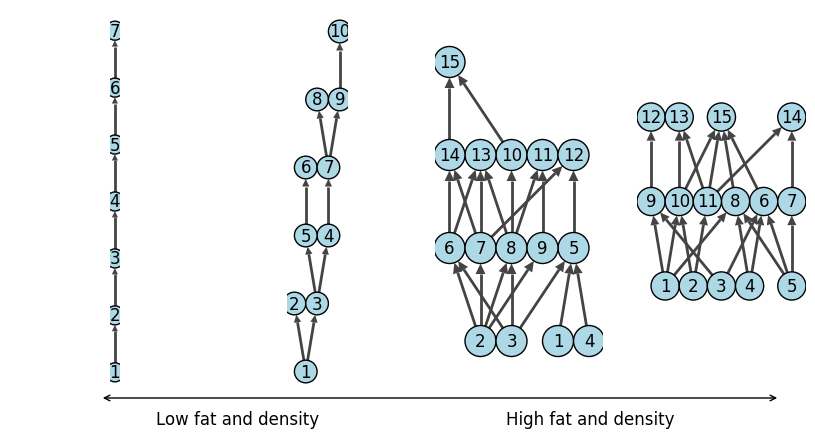

In [17]:
import igraph as ig

fig, axs = plt.subplots(1, len(values), figsize=(height, width))

for i, dag in enumerate(dg_dags):
  tasks, edges = dag.task_n_edge_dicts()
  ig_dag = ig.Graph.DictList(vertices=tasks, edges=edges, directed=True)
  layout = ig_dag.layout_sugiyama(vgap=3, hgap=1)
  ig.plot(ig_dag, target=axs[i], layout=layout,
          vertex_color='lightblue', vertex_label=ig_dag.vs["name"],
          edge_width=2, vertex_size=1.0, edge_arrow_size=.025)

# Draw arrow
plt.annotate('', xy=(0.10, 0.08), xycoords='figure fraction', xytext=(0.78, 0.08),
             arrowprops=dict(arrowstyle="<->", color='black'))
plt.text(0.25, 0.05, "Low fat and density", fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.6, 0.05, "High fat and density", fontsize=12, transform=plt.gcf().transFigure)